# Generate table of hourly volumes for every origin->destination stop pair

In [258]:
%%time
trip_volumes = df.groupby(by=['starthour','start_station_id', 'end_station_id', "trajectory"]).count()[['tripduration']]
trip_volumes.columns = ['volume']
trip_volumes = pd.DataFrame(trip_volumes.to_records())
trip_volumes.index = trip_volumes['trajectory']

KeyError: 'starthour'

In [15]:
max(trip_volumes['volume'])

15

In [16]:
trip_volumes.head()

,starthour,start station id,end station id,trajectory,volume
trajectory,,,,,
"(128, 382)",2018-01-01,128,382,"(128, 382)",1
"(146, 249)",2018-01-01,146,249,"(146, 249)",1
"(161, 439)",2018-01-01,161,439,"(161, 439)",1
"(238, 461)",2018-01-01,238,461,"(238, 461)",1
"(238, 494)",2018-01-01,238,494,"(238, 494)",1


In [17]:
trajectories = np.unique(trip_volumes['trajectory'])

In [18]:
len(trajectories)

108324

In [19]:
trajectories[0]

'(119, 119)'

In [20]:
results = []
for i in tqdm(trajectories):
    subset = trip_volumes.loc[[i]].copy()
    hourly = subset.resample('H', on='starthour').sum()[['volume']].reindex(hour_range).fillna(0)
    hourly['trajectory'] = i
    hourly['volume_t-1'] = hourly['volume'].shift(1)
    hourly['volume_t-2'] = hourly['volume'].shift(2)
    hourly['volume_t-3'] = hourly['volume'].shift(3)
    hourly['volume_t-4'] = hourly['volume'].shift(4)
    hourly['volume_t-5'] = hourly['volume'].shift(5)
    hourly['volume_t-6'] = hourly['volume'].shift(6)
    hourly['volume_t-7'] = hourly['volume'].shift(7)
    hourly['volume_t-8'] = hourly['volume'].shift(8)
    hourly['volume_t-9'] = hourly['volume'].shift(9)
    hourly['volume_t-10'] = hourly['volume'].shift(10)
    hourly['volume_t-11'] = hourly['volume'].shift(11)
    hourly['volume_t-12'] = hourly['volume'].shift(12)
    hourly['volume_t-13'] = hourly['volume'].shift(13)
    hourly['volume_t-14'] = hourly['volume'].shift(14)
    hourly['volume_t-15'] = hourly['volume'].shift(15)
    hourly['volume_t-16'] = hourly['volume'].shift(16)
    hourly['volume_t-17'] = hourly['volume'].shift(17)
    hourly['volume_t-18'] = hourly['volume'].shift(18)
    hourly['volume_t-19'] = hourly['volume'].shift(19)
    hourly['volume_t-20'] = hourly['volume'].shift(20)
    hourly['volume_t-21'] = hourly['volume'].shift(21)
    hourly['volume_t-22'] = hourly['volume'].shift(22)
    hourly['volume_t-23'] = hourly['volume'].shift(23)
    hourly['volume_t-24'] = hourly['volume'].shift(24)
    hourly = hourly.dropna()
    results.append(hourly)

100%|██████████| 108324/108324 [1:22:46<00:00, 21.81it/s]


In [21]:
%%time
output = pd.concat(results)

CPU times: user 55.9 s, sys: 53.7 s, total: 1min 49s
Wall time: 2min 11s


In [22]:
output.shape

(77993280, 26)

In [23]:
output.head()

,volume,trajectory,volume_t-1,volume_t-2,volume_t-3,volume_t-4,volume_t-5,volume_t-6,volume_t-7,volume_t-8,...,volume_t-15,volume_t-16,volume_t-17,volume_t-18,volume_t-19,volume_t-20,volume_t-21,volume_t-22,volume_t-23,volume_t-24
2018-01-02 00:00:00,0.0,"(119, 119)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-02 01:00:00,0.0,"(119, 119)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-02 02:00:00,0.0,"(119, 119)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-02 03:00:00,0.0,"(119, 119)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-02 04:00:00,0.0,"(119, 119)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
output.tail()

,volume,trajectory,volume_t-1,volume_t-2,volume_t-3,volume_t-4,volume_t-5,volume_t-6,volume_t-7,volume_t-8,...,volume_t-15,volume_t-16,volume_t-17,volume_t-18,volume_t-19,volume_t-20,volume_t-21,volume_t-22,volume_t-23,volume_t-24
2018-01-31 19:00:00,0.0,"(83, 83)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-31 20:00:00,0.0,"(83, 83)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-31 21:00:00,0.0,"(83, 83)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-31 22:00:00,0.0,"(83, 83)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-31 23:00:00,0.0,"(83, 83)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
%%time
#output.to_csv("training_data.csv")

CPU times: user 23min 4s, sys: 58.4 s, total: 24min 2s
Wall time: 25min 23s


In [26]:
%%time
#output.to_csv("hourly_trajectories.csv")

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


In [27]:
output.shape

(77993280, 26)

# Simple test

In [487]:
df.shape

(718990, 19)

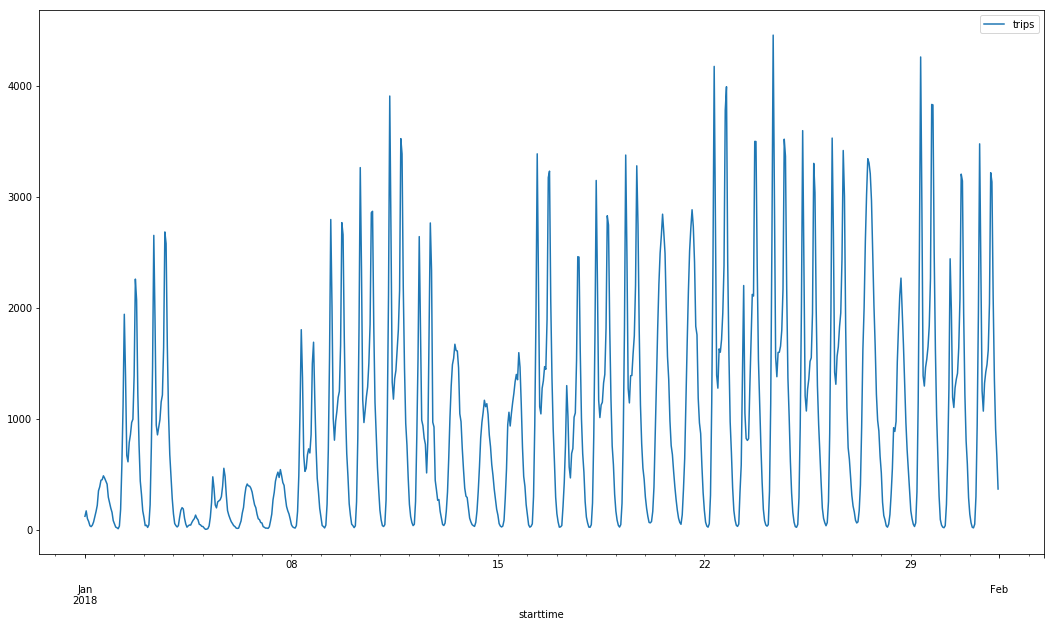

In [488]:
hourly_summary.plot(figsize=(18,10))

In [489]:
hourly_summary.head()

,trips
starttime,
2018-01-01 00:00:00,119
2018-01-01 01:00:00,168
2018-01-01 02:00:00,98
2018-01-01 03:00:00,72
2018-01-01 04:00:00,34


In [490]:
list(range(1,10+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [491]:
hourly_summary_lags = hourly_summary.copy()
hourly_summary_lags['volume'] = hourly_summary_lags['trips']

def create_lagging_variables(data, num):
    for i in range(1, num+1):
        column_name = 'volume_t-{}'.format(i)
        data[column_name] = data['volume'].shift(i)
    return data

hourly_summary_lags = create_lagging_variables(hourly_summary_lags, 24 * 7)

In [492]:
del hourly_summary_lags['trips']

In [493]:
hourly_summary_lags = hourly_summary_lags.dropna()

In [494]:
hourly_summary_lags.head()

,volume,volume_t-1,volume_t-2,volume_t-3,volume_t-4,volume_t-5,volume_t-6,volume_t-7,volume_t-8,volume_t-9,...,volume_t-159,volume_t-160,volume_t-161,volume_t-162,volume_t-163,volume_t-164,volume_t-165,volume_t-166,volume_t-167,volume_t-168
starttime,,,,,,,,,,,,,,,,,,,,,
2018-01-08 00:00:00,43,94.0,140.0,169.0,209.0,293.0,398.0,423.0,485.0,540.0,...,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0,119.0
2018-01-08 01:00:00,24,43.0,94.0,140.0,169.0,209.0,293.0,398.0,423.0,485.0,...,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0
2018-01-08 02:00:00,17,24.0,43.0,94.0,140.0,169.0,209.0,293.0,398.0,423.0,...,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0
2018-01-08 03:00:00,13,17.0,24.0,43.0,94.0,140.0,169.0,209.0,293.0,398.0,...,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0
2018-01-08 04:00:00,35,13.0,17.0,24.0,43.0,94.0,140.0,169.0,209.0,293.0,...,444.0,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0


In [495]:
%%time
features_to_include = [i for i in hourly_summary_lags.columns if i not in ['volume', 'trajectory']]
X = hourly_summary_lags[features_to_include]

CPU times: user 970 µs, sys: 77 µs, total: 1.05 ms
Wall time: 982 µs


In [496]:
y = hourly_summary_lags[['volume']]

In [497]:
X.head()

,volume_t-1,volume_t-2,volume_t-3,volume_t-4,volume_t-5,volume_t-6,volume_t-7,volume_t-8,volume_t-9,volume_t-10,...,volume_t-159,volume_t-160,volume_t-161,volume_t-162,volume_t-163,volume_t-164,volume_t-165,volume_t-166,volume_t-167,volume_t-168
starttime,,,,,,,,,,,,,,,,,,,,,
2018-01-08 00:00:00,94.0,140.0,169.0,209.0,293.0,398.0,423.0,485.0,540.0,469.0,...,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0,119.0
2018-01-08 01:00:00,43.0,94.0,140.0,169.0,209.0,293.0,398.0,423.0,485.0,540.0,...,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0
2018-01-08 02:00:00,24.0,43.0,94.0,140.0,169.0,209.0,293.0,398.0,423.0,485.0,...,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0
2018-01-08 03:00:00,17.0,24.0,43.0,94.0,140.0,169.0,209.0,293.0,398.0,423.0,...,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0
2018-01-08 04:00:00,13.0,17.0,24.0,43.0,94.0,140.0,169.0,209.0,293.0,398.0,...,444.0,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0


In [498]:
y.head()

,volume
starttime,
2018-01-08 00:00:00,43
2018-01-08 01:00:00,24
2018-01-08 02:00:00,17
2018-01-08 03:00:00,13
2018-01-08 04:00:00,35


In [499]:
# make a test variable
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, y.shape[0])
y['test'] = y['volume']**2 + s

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [500]:
y.head()

,volume,test
starttime,,
2018-01-08 00:00:00,43,1848.941119
2018-01-08 01:00:00,24,575.986343
2018-01-08 02:00:00,17,289.022674
2018-01-08 03:00:00,13,169.078532
2018-01-08 04:00:00,35,1225.075641


In [501]:
#X.plot(figsize=(18,14))

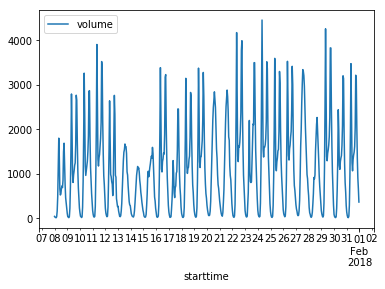

In [502]:
y[['volume']].plot()

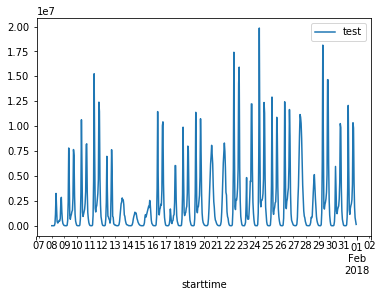

In [503]:
y[['test']].plot()

In [504]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

import matplotlib.pyplot as plt
import seaborn as sns
import math

In [505]:
X = np.array(X)
#y = np.array(y).reshape((len(y), 1))
y = np.array(y).reshape((len(y), 2))

In [506]:
X.shape

(576, 168)

In [507]:
y.shape

(576, 2)

Split the data into training and testing.

In [508]:
n_train_rows = 100

X_train = X[0 : n_train_rows, ]
X_test = X[n_train_rows:, ]

y_train = y[0 : n_train_rows]
y_test = y[n_train_rows:]

In [509]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [510]:
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.fit_transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.fit_transform(y_test)

In [511]:
X_train.shape

(100, 168)

In [512]:
X_test.shape

(476, 168)

In [513]:
y_train.shape

(100, 2)

In [514]:
# Reshape
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

In [515]:
seed = 7
np.random.seed(seed)

In [516]:
X_train.shape

(100, 168, 1)

In [517]:
y_train.shape

(100, 2)

In [533]:
model = Sequential()
model.add(LSTM(1000, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dense(1000, activation='linear'))
model.add(LSTM(1000))
model.add(Dense(2, activation='linear'))

model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(X_train, y_train, epochs=20, batch_size=50,
                    validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 100 samples, validate on 476 samples
Epoch 1/20
 - 62s - loss: 0.1946 - val_loss: 0.2033
Epoch 2/20
 - 57s - loss: 0.1896 - val_loss: 0.1401
Epoch 3/20
 - 60s - loss: 0.1481 - val_loss: 0.1331
Epoch 4/20
 - 69s - loss: 0.1505 - val_loss: 0.1239
Epoch 5/20
 - 71s - loss: 0.1359 - val_loss: 0.1128
Epoch 6/20
 - 68s - loss: 0.1251 - val_loss: 0.1052
Epoch 7/20
 - 72s - loss: 0.1242 - val_loss: 0.0954
Epoch 8/20
 - 74s - loss: 0.1165 - val_loss: 0.0851
Epoch 9/20
 - 72s - loss: 0.1099 - val_loss: 0.0816
Epoch 10/20
 - 70s - loss: 0.1133 - val_loss: 0.0823
Epoch 11/20
 - 62s - loss: 0.1075 - val_loss: 0.0861
Epoch 12/20
 - 60s - loss: 0.1054 - val_loss: 0.0738
Epoch 13/20
 - 61s - loss: 0.1007 - val_loss: 0.0749
Epoch 14/20
 - 64s - loss: 0.0980 - val_loss: 0.0772
Epoch 15/20
 - 85s - loss: 0.0973 - val_loss: 0.0748
Epoch 16/20
 - 63s - loss: 0.0976 - val_loss: 0.0710
Epoch 17/20
 - 69s - loss: 0.0968 - val_loss: 0.0716
Epoch 18/20
 - 85s - loss: 0.0938 - val_loss: 0.0704
Epoch 19/

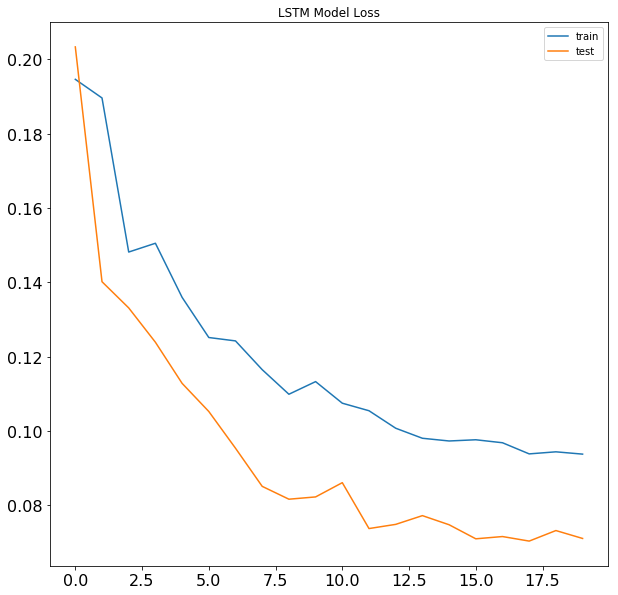

In [534]:
history_loss = pd.DataFrame()
history_loss['train'] = history.history['loss']
history_loss['test'] = history.history['val_loss']
history_loss.plot(figsize=(10,10), fontsize=16,
                title='LSTM Model Loss');

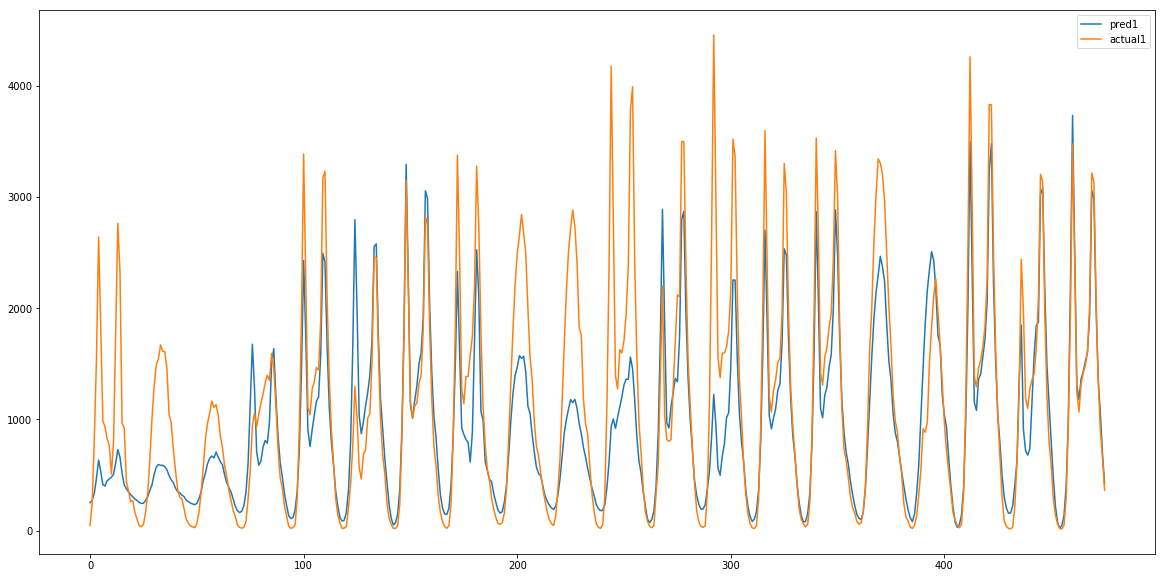

In [537]:
yhat = model.predict(X_test)
#yhat = scaler_y.inverse_transform(np.array(yhat).reshape((len(yhat), 1)))
yhat = scaler_y.inverse_transform(np.array(yhat).reshape((len(yhat), 2)))
#actual = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))
actual = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 2)))
results = pd.DataFrame()
#results['pred'] = yhat[:,0]
#results['actual'] = actual[:,0]
#results.plot(figsize=(20,10))

results['pred1'] = yhat[:,0]
results['pred2'] = yhat[:,1]
results['actual1'] = actual[:,0]
results['actual2'] = actual[:,1]
results[['pred1', 'actual1']].plot(figsize=(20,10))

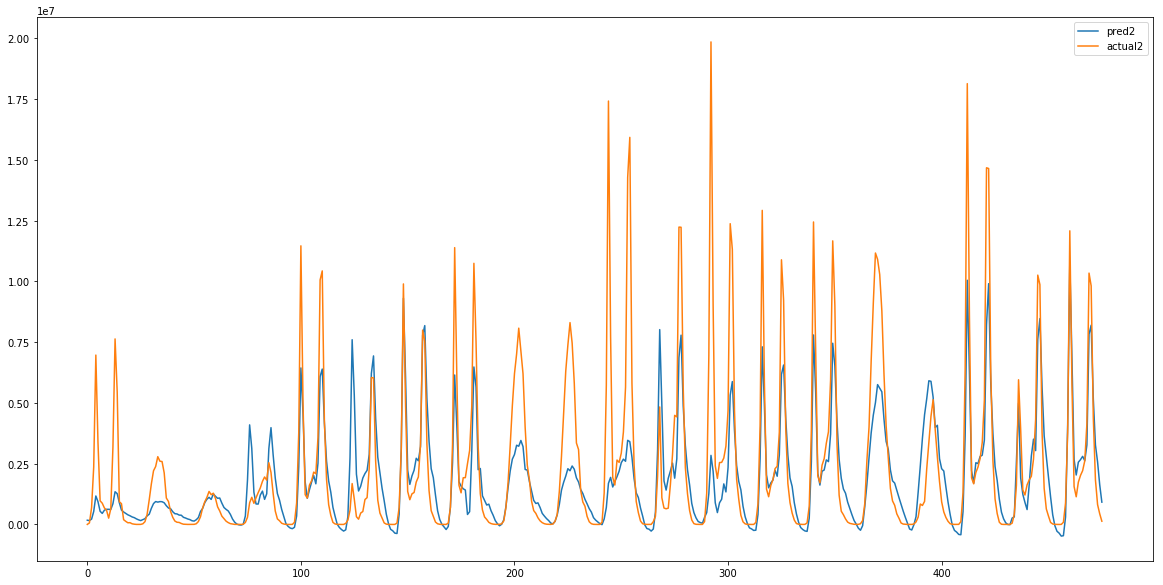

In [538]:
results[['pred2', 'actual2']].plot(figsize=(20,10))

In [529]:
actual.shape

(476, 2)

In [530]:
yhat[:,0]

array([ 506.74408 ,  559.9362  ,  655.5617  ,  754.6928  ,  789.06915 ,
        707.8085  ,  652.24927 ,  654.0934  ,  672.07947 ,  684.7899  ,
        722.5215  ,  793.95886 ,  876.6816  ,  902.4215  ,  818.78546 ,
        718.2939  ,  656.19415 ,  629.2843  ,  606.65967 ,  586.8726  ,
        569.95624 ,  553.0565  ,  537.73737 ,  523.02814 ,  516.0071  ,
        519.86285 ,  539.5804  ,  571.99115 ,  623.5406  ,  683.2273  ,
        750.4596  ,  790.83636 ,  805.5914  ,  806.8027  ,  805.5923  ,
        789.94617 ,  761.40894 ,  725.73016 ,  694.4321  ,  664.89056 ,
        631.1826  ,  610.00574 ,  595.72986 ,  577.07623 ,  559.7144  ,
        537.9651  ,  523.26056 ,  507.3952  ,  494.41455 ,  489.52905 ,
        505.90146 ,  547.75604 ,  609.13086 ,  684.33673 ,  744.54816 ,
        800.50037 ,  830.07916 ,  845.74207 ,  851.3589  ,  863.20825 ,
        828.286   ,  787.751   ,  737.5824  ,  668.1068  ,  616.8766  ,
        579.5945  ,  538.87244 ,  489.45743 ,  437.1577  ,  383.

In [531]:
yhat

array([[ 5.06744080e+02,  1.69955938e+05],
       [ 5.59936218e+02,  2.51659359e+05],
       [ 6.55561707e+02,  4.29438812e+05],
       [ 7.54692810e+02,  6.36419688e+05],
       [ 7.89069153e+02,  7.27428375e+05],
       [ 7.07808472e+02,  5.66843625e+05],
       [ 6.52249268e+02,  4.45359219e+05],
       [ 6.54093384e+02,  4.35990812e+05],
       [ 6.72079468e+02,  4.55215156e+05],
       [ 6.84789917e+02,  4.55156344e+05],
       [ 7.22521484e+02,  5.02981344e+05],
       [ 7.93958862e+02,  6.29288500e+05],
       [ 8.76681580e+02,  8.02782125e+05],
       [ 9.02421509e+02,  8.81591438e+05],
       [ 8.18785461e+02,  7.33146625e+05],
       [ 7.18293884e+02,  5.41567562e+05],
       [ 6.56194153e+02,  4.24651719e+05],
       [ 6.29284302e+02,  3.80844875e+05],
       [ 6.06659668e+02,  3.46489969e+05],
       [ 5.86872620e+02,  3.18550625e+05],
       [ 5.69956238e+02,  2.97033406e+05],
       [ 5.53056519e+02,  2.75009500e+05],
       [ 5.37737366e+02,  2.54344094e+05],
       [ 5.

In [532]:
yhat[0][1]

169955.94

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(X_train, y_train, epochs=20, batch_size=50,
                    validation_data=(X_test, y_test), verbose=2, shuffle=False)

In [415]:
model = Sequential()
model.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(X_train, y_train, epochs=20, batch_size=50,
                    validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 500 samples, validate on 76 samples
Epoch 1/20
 - 15s - loss: 0.2095 - val_loss: 0.2129
Epoch 2/20
 - 13s - loss: 0.1597 - val_loss: 0.1609
Epoch 3/20
 - 13s - loss: 0.1422 - val_loss: 0.1343
Epoch 4/20
 - 14s - loss: 0.1189 - val_loss: 0.1256
Epoch 5/20
 - 14s - loss: 0.1244 - val_loss: 0.1231
Epoch 6/20
 - 13s - loss: 0.1076 - val_loss: 0.1058
Epoch 7/20
 - 14s - loss: 0.1035 - val_loss: 0.0929
Epoch 8/20
 - 14s - loss: 0.1015 - val_loss: 0.0825
Epoch 9/20
 - 15s - loss: 0.1006 - val_loss: 0.0823
Epoch 10/20
 - 15s - loss: 0.0946 - val_loss: 0.0668
Epoch 11/20
 - 15s - loss: 0.0922 - val_loss: 0.0640
Epoch 12/20
 - 15s - loss: 0.0927 - val_loss: 0.0567
Epoch 13/20
 - 15s - loss: 0.0889 - val_loss: 0.0541
Epoch 14/20
 - 15s - loss: 0.0910 - val_loss: 0.0549
Epoch 15/20
 - 16s - loss: 0.0886 - val_loss: 0.0519
Epoch 16/20
 - 14s - loss: 0.0883 - val_loss: 0.0530
Epoch 17/20
 - 14s - loss: 0.0831 - val_loss: 0.0452
Epoch 18/20
 - 15s - loss: 0.0803 - val_loss: 0.0433
Epoch 19/2

In [411]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dense(100, activation='linear'))
model.add(LSTM(100))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(X_train, y_train, epochs=20, batch_size=50,
                    validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 500 samples, validate on 76 samples
Epoch 1/20
 - 5s - loss: 0.1831 - val_loss: 0.1771
Epoch 2/20
 - 3s - loss: 0.1546 - val_loss: 0.1488
Epoch 3/20
 - 3s - loss: 0.1307 - val_loss: 0.1247
Epoch 4/20
 - 3s - loss: 0.1275 - val_loss: 0.1395
Epoch 5/20
 - 3s - loss: 0.1060 - val_loss: 0.1115
Epoch 6/20
 - 3s - loss: 0.1090 - val_loss: 0.1087
Epoch 7/20
 - 3s - loss: 0.1015 - val_loss: 0.0972
Epoch 8/20
 - 3s - loss: 0.0986 - val_loss: 0.0870
Epoch 9/20
 - 3s - loss: 0.0960 - val_loss: 0.0794
Epoch 10/20
 - 3s - loss: 0.0914 - val_loss: 0.0676
Epoch 11/20
 - 3s - loss: 0.0893 - val_loss: 0.0595
Epoch 12/20
 - 3s - loss: 0.0869 - val_loss: 0.0519
Epoch 13/20
 - 3s - loss: 0.0836 - val_loss: 0.0432
Epoch 14/20
 - 3s - loss: 0.0846 - val_loss: 0.0491
Epoch 15/20
 - 3s - loss: 0.0797 - val_loss: 0.0362
Epoch 16/20
 - 3s - loss: 0.0808 - val_loss: 0.0461
Epoch 17/20
 - 3s - loss: 0.0789 - val_loss: 0.0363
Epoch 18/20
 - 3s - loss: 0.0769 - val_loss: 0.0414
Epoch 19/20
 - 3s - loss: 0.

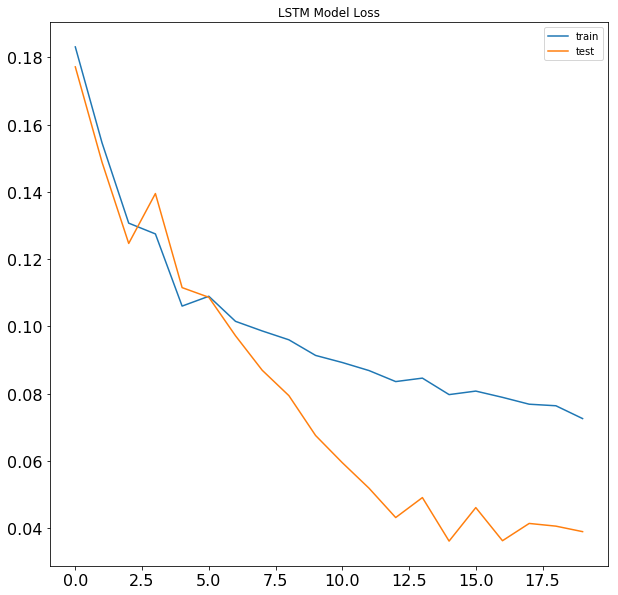

In [412]:
history_loss = pd.DataFrame()
history_loss['train'] = history.history['loss']
history_loss['test'] = history.history['val_loss']
history_loss.plot(figsize=(10,10), fontsize=16,
                title='LSTM Model Loss');

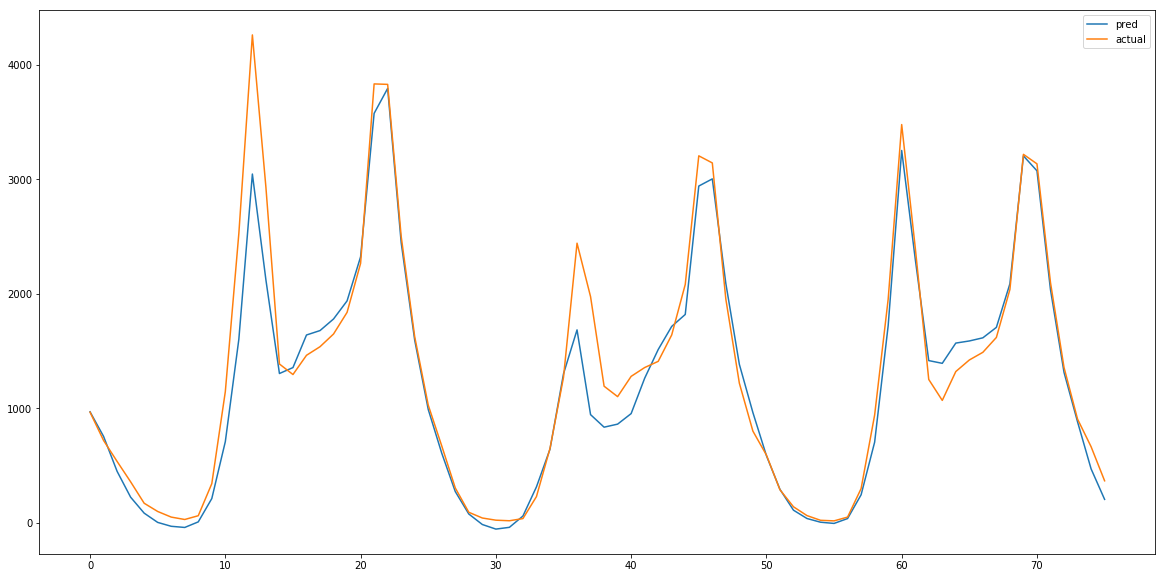

In [413]:
yhat = model.predict(X_test)
yhat = scaler_y.inverse_transform(np.array(yhat).reshape((len(yhat), 1)))
actual = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))
results = pd.DataFrame()
results['pred'] = yhat[:,0]
results['actual'] = actual[:,0]
results.plot(figsize=(20,10))

# Test two features in y